In [23]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import pandas as pd
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [3]:
dataDir='data/COCO/annotations'
dataType='train2014'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [4]:
coco=COCO(annFile)
coco

loading annotations into memory...
Done (t=13.02s)
creating index...
index created!


In [5]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
sports kitchen electronic food accessory appliance outdoor animal person vehicle indoor furniture


In [6]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds[0:5]

[379520, 55809, 46978, 89350, 306440]

In [7]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [558036])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

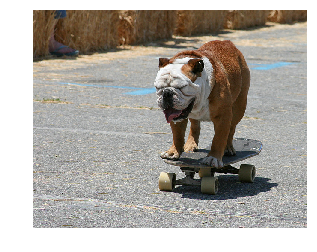

In [8]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'].replace('http://images.cocodataset.org', 'data/COCO/images'))
plt.axis('off')
plt.imshow(I)
plt.show()

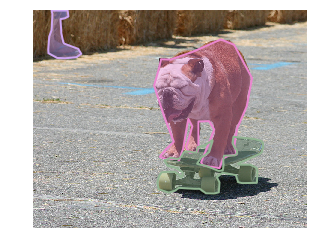

In [9]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [10]:
# coco_kps=COCO(instance_file)
# coco_kps.getImgIds()

In [11]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=5.99s)
creating index...
index created!


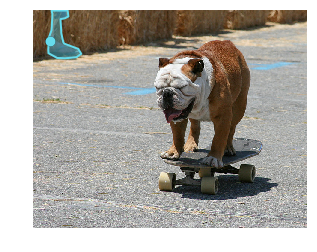

In [12]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)


In [13]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=5.27s)
creating index...
index created!


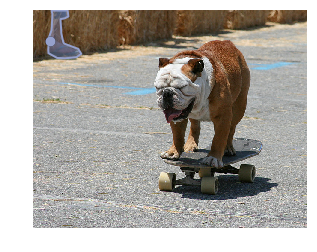

In [14]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)


In [15]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=1.03s)
creating index...
index created!


A small dog is riding on a skate board.
A brown and white dog on skateboard next to bales of hay.
A English Bulldog on top of a skate board.
A bull dog coasting along on a skate board.
a brown and white dog is riding a skateboard


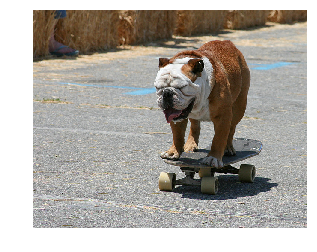

In [16]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()

In [17]:
import json

In [18]:
instance_file = '{}/annotations/instances_{}.json'.format(dataDir,dataType)
instance_file

'data/COCO/annotations/annotations/instances_train2014.json'

In [19]:
with open(instance_file, 'r') as f:
    json_data = json.load(f)


### Creating a csv that had image and corresponding captions

In [20]:
#DATA = 'train2014' # val2014, train2014, test2014
DATA = 'train2014'
SUPCAT = 'animal' # any super category

In [21]:
def get_captions(anns):return [cap['caption'] for cap in anns]

In [24]:
def gen_imfname_captions(im_id, coco, coco_caps):
    im = coco.loadImgs(im_id)[0]
    annIds = coco_caps.getAnnIds(imgIds=im_id)
    anns = coco_caps.loadAnns(annIds)
    im_fname, im_captions = im['file_name'], get_captions(anns)
    return im_fname, im_captions

annFile = f'data/COCO/annotations/annotations/instances_{DATA}.json'
coco = COCO(annFile)
catIds = coco.getCatIds(supNms=[SUPCAT]);

imgIds = []
for cat_id in catIds:
    imgIds.extend(coco.getImgIds(catIds=[cat_id]))
    
f'{len(imgIds)} images collected'

annFile = f'data/COCO/annotations/annotations/captions_{DATA}.json'
coco_caps = COCO(annFile)

fnames = []
captions = []
for im_id in imgIds:
    im_fname, im_caption = gen_imfname_captions(im_id, coco, coco_caps)
    fnames.append(im_fname)
    captions.append(im_caption)
    
df=pd.DataFrame({"img_fname":fnames, "captions":captions})[["img_fname", "captions"]]

df.to_csv(f"data/{DATA}.csv", index=False)

loading annotations into memory...
Done (t=10.31s)
creating index...
index created!
loading annotations into memory...
Done (t=0.67s)
creating index...
index created!
